In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras.models import Model
from keras import optimizers
from datetime import datetime as dt
import pickle
import random
import os
import string
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 911kB 18.9MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ 

In [ ]:
#Scraping data of last 4 years
name = 'Asian Paints'
market = 'BSE'

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


<selenium.webdriver.chrome.webdriver.WebDriver (session="dd30dfe0835386fd8658dd303706ba3c")>

In [ ]:
import time
from bs4 import BeautifulSoup

#load site
driver.get("https://www.moneycontrol.com/stocks/histstock.php?classic=true");

#name and market
name = 'Reliance Industries'
market = 'BSE'
searchBar = driver.find_element_by_id("mycomp")
searchBar.send_keys(u'\ue009' + u'\ue003')
searchBar.send_keys(name)
time.sleep(2)
namelist = driver.find_elements_by_xpath("//div[@id='suggest']//ul[@class='suglist']/li/a")
#getting perfect name of stock
for i in namelist:
        data = BeautifulSoup(i.get_attribute('innerHTML'),'html.parser').text
        data = data.lower()
        if(data.find(name.lower()) != -1):
            i.click()
            break

#choosing correct market
markets = driver.find_elements_by_xpath("//select[@id='ex']/option");
for i in markets:
    data = BeautifulSoup(i.get_attribute('innerHTML'),'html.parser').text.lower()
    if(data == market.lower()):
        i.click()
#changing date

today = date.today()
d1 = today.strftime("%d/%m/%Y")

print(d1, type(d1))
year = '2010'
currMonth = d1.split('/')[1]
currDate = d1.split('/')[0]

dailyForm = driver.find_element_by_name("frm_dly")
frmyear = dailyForm.find_element_by_class_name('PT4').find_elements_by_tag_name('select')[2].find_elements_by_tag_name('option')
for i in frmyear:
    if(i.text.lower().find(year) != -1):
        i.click()
        break
endmonth = dailyForm.find_elements_by_class_name('PT4')[1].find_elements_by_tag_name('select')[1].find_elements_by_tag_name('option')
for i in endmonth:
    if(i.get_attribute('value') == currMonth):
        i.click();
        break
endDate = dailyForm.find_elements_by_class_name('PT4')[1].find_elements_by_tag_name('select')[0].find_elements_by_tag_name('option')
for i in endDate:
    if(i.get_attribute('value') == currDate):
        i.click();
        break
dailyForm.find_elements_by_class_name('PT4')[1].find_element_by_tag_name('input').click()


##Making Table for data
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
pdTable = pd.DataFrame(columns = columns)
i = 0
while(1):
    pointers = driver.find_element_by_xpath("//div[@class='gray2_11']/a[last()]")
    table = driver.find_element_by_xpath("//div[@class='MT12']")
    columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    data = BeautifulSoup(table.get_attribute('innerHTML'),'lxml')
    temp = pd.read_html(str(data), header = 0)
    temp[0].drop(columns = ['- SPREAD -', '- SPREAD -.1'], axis = 1, inplace = True)
    print(type(temp[0]))
    print(temp[0].columns)
    temp = temp[0].loc[1:]
    pdTable = pd.concat([pdTable, temp], axis=0)
    print(i)
    i+=1
    if(pointers.text.find("Next") == -1):
        break
    else: 
        time.sleep(1)
        driver.get(pointers.get_attribute('href'))
print(pdTable)

29/04/2021 <class 'str'>
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
0
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
1
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
2
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
3
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
4
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
5
           Date     Open     High      Low    Close    Volume
1    28-04-2021  1999.45  2007.40  1980.75  1996.05    442402
2    27-04-2021  1943.00  1997.55  1940.90  1988.90    348348
3    26-04-2021  1916.25  1961.00  1911.85  1937.45   1330622
4    23-04-2021  1903.00  1919.00  1896.00 

In [ ]:
plt.rcParams['figure.figsize'] = 20,10
x_normaliser = MinMaxScaler(feature_range=(0,1))
df = pdTable
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']
df = df.sort_index(ascending=True, axis=0)
df = df.drop('Date', axis = 1)
df.head()
typesDict = {
    'Open': float, 
    'High': float,
    'Low': float,
    'Close':float,
    'Volume':float
}
df = df.astype(typesDict)
print(df.info())
print(df.dtypes)
print(df.describe())
plt.figure(figsize=(16, 8))
data = df
data_normalised = x_normaliser.fit_transform(df)
print(data_normalised[0:20])
print(data)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2808 entries, 2010-01-04 to 2021-04-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2808 non-null   float64
 1   High    2808 non-null   float64
 2   Low     2808 non-null   float64
 3   Close   2808 non-null   float64
 4   Volume  2808 non-null   float64
dtypes: float64(5)
memory usage: 131.6 KB
None
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
              Open         High          Low        Close        Volume
count  2808.000000  2808.000000  2808.000000  2808.000000  2.808000e+03
mean    763.892475   772.549982   754.148426   762.713743  1.848780e+06
std     489.057618   494.896263   481.635819   487.770958  2.605427e+07
min     334.320000   338.160000   333.580000   334.910000  2.027000e+03
25%     436.815000   441.600000   431.485000   435.795000  4.450005e+05
50%     505.440000   510.640000   

<Figure size 1152x576 with 0 Axes>

In [ ]:
history_points = 65 # 75 for Asuan Paints
histories_normalised =      np.array([data_normalised[i  : i + history_points].copy() for i in range(len(data_normalised) - history_points)])
next_day_open_values_normalised = np.array([data_normalised[:,0][i + history_points].copy() for i in range(len(data_normalised) - history_points)])
next_day_open_values_normalised = np.expand_dims(next_day_open_values_normalised, -1)

next_day_open_values = np.array([data.iloc[:,0][i + history_points].copy() for i in range(len(data) - history_points)])
next_day_open_values = np.expand_dims(next_day_open_values, -1)

def calc_ema(his, time_period):
    # https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
    sma = np.mean(his[:,3])
    ema_values = [sma]
    k = 2 / (1 + time_period)
    for i in range(len(his) - time_period, len(his)):
        close = his[i][3]
        ema_values.append(close * k + ema_values[-1] * (1 - k))
    return ema_values[-1]

def RSI(values, time_period):
  up , down = 0.0001, 0.0001

  for i in range(len(values)-time_period-1, len(values)-1):
    delta = values[i+1][3]-values[i][3];
    if(delta >= 0):
      up += delta
    else:
      down -= delta
    rs = up/down
    rsi = 100- (100/(1+rs))
    rsi = max(rsi, 1)
    return rsi/100

technical_indicators = []
for his in histories_normalised:
    # note since we are using his[3] we are taking the SMA of the closing price
    sma = np.mean(his[:,3])
    macd = calc_ema(his, 12) - calc_ema(his, 26)
    # rsi = RSI(his, 50)
    technical_indicators.append(np.array([ macd, ]))

technical_indicators = np.array(technical_indicators)
tech_ind_normaliser = MinMaxScaler()
technical_indicators_normalised = tech_ind_normaliser.fit_transform(technical_indicators)

y_normaliser = MinMaxScaler()
y_normaliser.fit(next_day_open_values)
print(histories_normalised.shape, next_day_open_values.shape,next_day_open_values_normalised.shape)

(2743, 65, 5) (2743, 1) (2743, 1)


In [ ]:
 ## Dividing into test and train
# test_split = 0.99
# train_len = int(histories_normalised.shape[0] * test_split)
# test_len = histories_normalised.shape[0]-train_len
test_len = 40
train_len = histories_normalised.shape[0]-test_len
ohlcv_train = histories_normalised[:train_len]
tech_ind_train = technical_indicators[:train_len]
y_train = next_day_open_values_normalised[:train_len]

ohlcv_test = histories_normalised[train_len:]
tech_ind_test = technical_indicators[train_len:]
y_test = next_day_open_values_normalised[train_len:]

unscaled_y_test = next_day_open_values[train_len:]

print(ohlcv_train.shape, ohlcv_test.shape, y_train.shape, y_test.shape, unscaled_y_test.shape)

(2703, 65, 5) (40, 65, 5) (2703, 1) (40, 1) (40, 1)


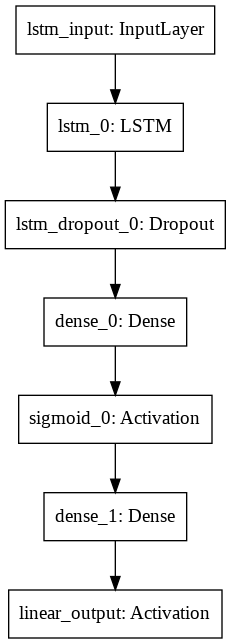

In [ ]:

lstm_input = Input(shape=(history_points, 5), name='lstm_input')
x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

from keras.utils import plot_model
plot_model(model, to_file='model.png')

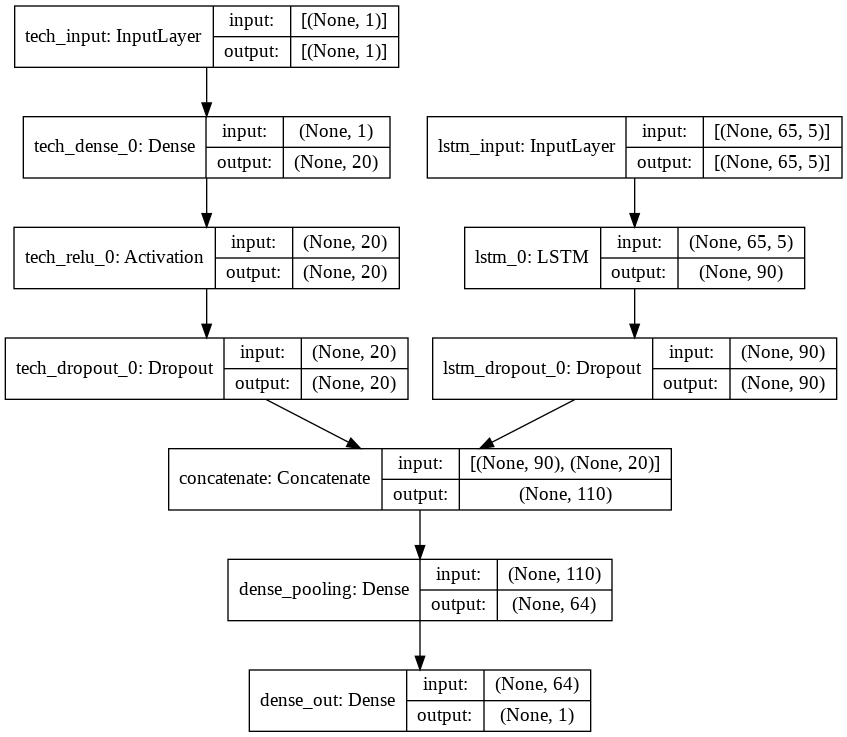

In [ ]:
# #Model 2
# lstm_input = Input(shape=(history_points, 5), name='lstm_input')
# dense_input = Input(shape=(technical_indicators.shape[1],), name='tech_input')
 
# # the first branch operates on the first input
# x = LSTM(50, return_sequences=True, name='lstm_0')(lstm_input)
# x = Dropout(0.4, name='lstm_dropout_0')(x)
# x = LSTM(units = 60, name='lstm_1')(x)
# x = Dropout(0.2, name='lstm_dropout_1')(x)
# lstm_branch = Model(inputs=lstm_input, outputs=x)
 
# # the second branch opreates on the second input
# y = Dense(20, name='tech_dense_0')(dense_input)
# y = Activation("relu", name='tech_relu_0')(y)
# y = Dropout(0.2, name='tech_dropout_0')(y)
# technical_indicators_branch = Model(inputs=dense_input, outputs=y)
 
# # combine the output of the two branches
# combined = concatenate([lstm_branch.output, technical_indicators_branch.output], name='concatenate')
 
# z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
# z = Dense(1, activation="linear", name='dense_out')(z)
 
# # our model will accept the inputs of the two branches and then output a single value
# model = Model(inputs=[lstm_branch.input, technical_indicators_branch.input], outputs=z)

# adam = optimizers.Adam(lr=0.0005)

# model.compile(optimizer=adam,
#               loss='mse')

# from keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=True)

#Model 2
lstm_input = Input(shape=(history_points, 5), name='lstm_input')
dense_input = Input(shape=(technical_indicators.shape[1],), name='tech_input')
 
# the first branch operates on the first input
x = LSTM(90, name='lstm_0')(lstm_input)
x = Dropout(0.27, name='lstm_dropout_0')(x)
lstm_branch = Model(inputs=lstm_input, outputs=x)
 
# the second branch opreates on the second input
y = Dense(20, name='tech_dense_0')(dense_input)
y = Activation("relu", name='tech_relu_0')(y)
y = Dropout(0.2, name='tech_dropout_0')(y)
technical_indicators_branch = Model(inputs=dense_input, outputs=y)
 
# combine the output of the two branches
combined = concatenate([lstm_branch.output, technical_indicators_branch.output], name='concatenate')
 
z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
z = Dense(1, activation="linear", name='dense_out')(z)
 
# our model will accept the inputs of the two branches and then output a single value
model = Model(inputs=[lstm_branch.input, technical_indicators_branch.input], outputs=z)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam,
              loss='mse')

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
print(ohlcv_train.shape, tech_ind_train.shape, y_train.shape)
# model.fit(x=ohlcv_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)
# evaluation = model.evaluate(ohlcv_test, y_test)
# print(evaluation)
model.fit(x=[ohlcv_train, tech_ind_train], y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)
evaluation = model.evaluate([ohlcv_test, tech_ind_test], y_test)
print(evaluation)


(2703, 65, 5) (2703, 1) (2703, 1)
Epoch 1/50
76/76 [==============================] - 5s 42ms/step - loss: 0.4465 - val_loss: 0.0370
Epoch 2/50
76/76 [==============================] - 3s 33ms/step - loss: 0.0030 - val_loss: 0.0344
Epoch 3/50
76/76 [==============================] - 3s 36ms/step - loss: 0.0024 - val_loss: 0.0263
Epoch 4/50
76/76 [==============================] - 3s 35ms/step - loss: 0.0021 - val_loss: 0.0217
Epoch 5/50
76/76 [==============================] - 3s 35ms/step - loss: 0.0018 - val_loss: 0.0177
Epoch 6/50
76/76 [==============================] - 3s 35ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 7/50
76/76 [==============================] - 3s 36ms/step - loss: 0.0010 - val_loss: 0.0066
Epoch 8/50
76/76 [==============================] - 3s 35ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 9/50
76/76 [==============================] - 3s 35ms/step - loss: 8.9815e-04 - val_loss: 0.0040
Epoch 10/50
76/76 [==============================] - 3s 35ms/step - los

In [ ]:
# tests = len(ohlcv_test)
# start_sample_t = ohlcv_test[0]
# start_sample = []
# for i in range(history_points):
#   start_sample.append(start_sample_t[i])
# y_test_predicted = []
# for i in range(tests):
#   temp = np.array(start_sample)
#   temp = np.reshape(temp, (1, temp.shape[0], temp.shape[1]))
#   sma = np.mean(temp[:,3])
#   macd = calc_ema(temp, 12) - calc_ema(temp, 26)
#   start_tech_ind = []
#   start_tech_ind.append(np.array([sma,macd,]))
#   start_tech_ind = np.array(start_tech_ind)
#   start_tech_ind = tech_ind_normaliser.transform(start_tech_ind)
#   preds = model.predict(x = [temp, start_tech_ind])
#   start_sample.pop(0)
#   start_sample.append(preds[0])
#   y_test_predicted.append(preds[0])
# y_test_predicted = np.array(y_test_predicted)
# y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)

y_test_predicted = []
y_test_predicted = model.predict([ohlcv_test, tech_ind_test])
# model.predict returns normalised values
# now we scale them back up using the y_scaler from before
y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)

# also getting predictions for the entire dataset, just to see how it performs
y_predicted = model.predict([histories_normalised, technical_indicators])
y_predicted = y_normaliser.inverse_transform(y_predicted)
print(y_test_predicted.shape, unscaled_y_test.shape)
assert unscaled_y_test.shape == y_test_predicted.shape
real_mse = np.mean(np.square(unscaled_y_test - y_test_predicted))
scaled_mse = real_mse / (np.max(unscaled_y_test) - np.min(unscaled_y_test)) * 100
print(scaled_mse)



(40, 1) (40, 1)
1777.1008320263404


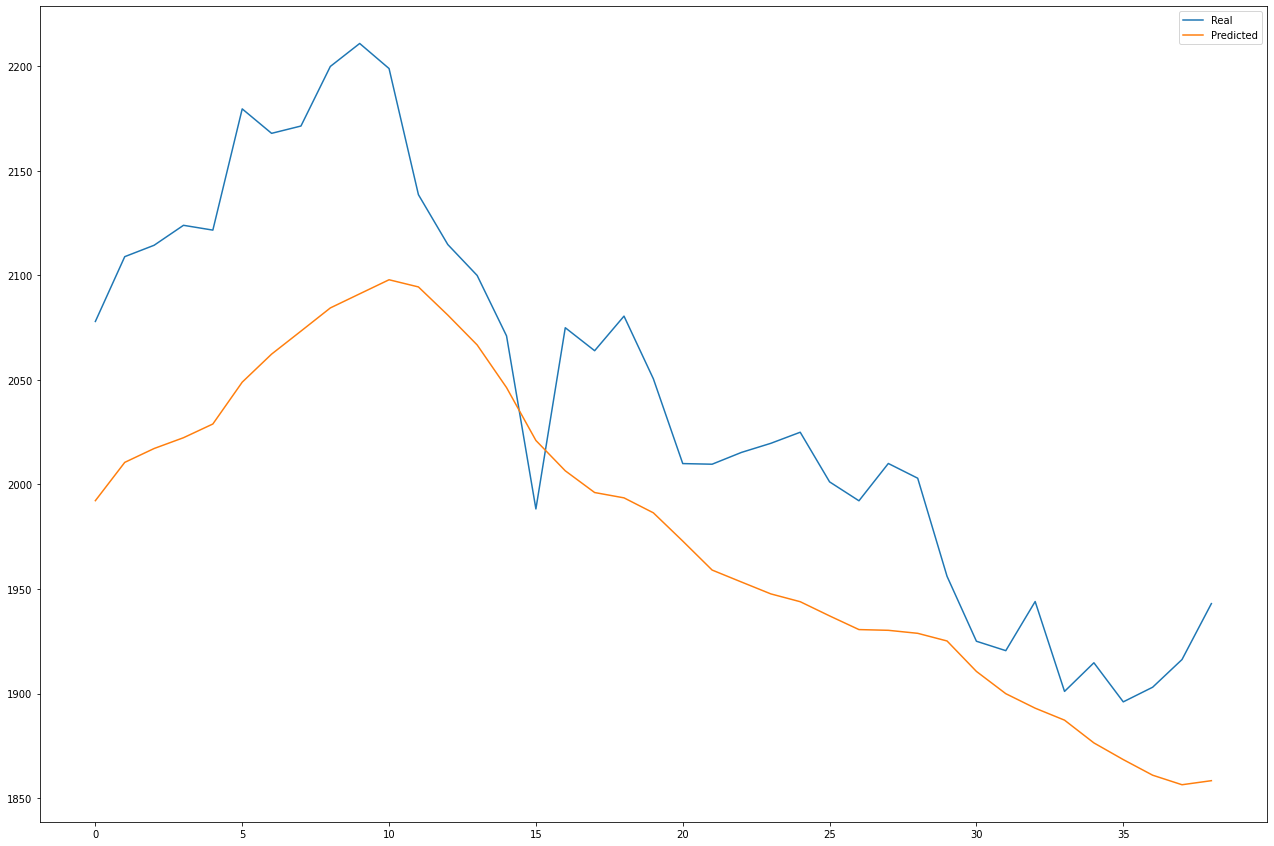

In [ ]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(unscaled_y_test[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


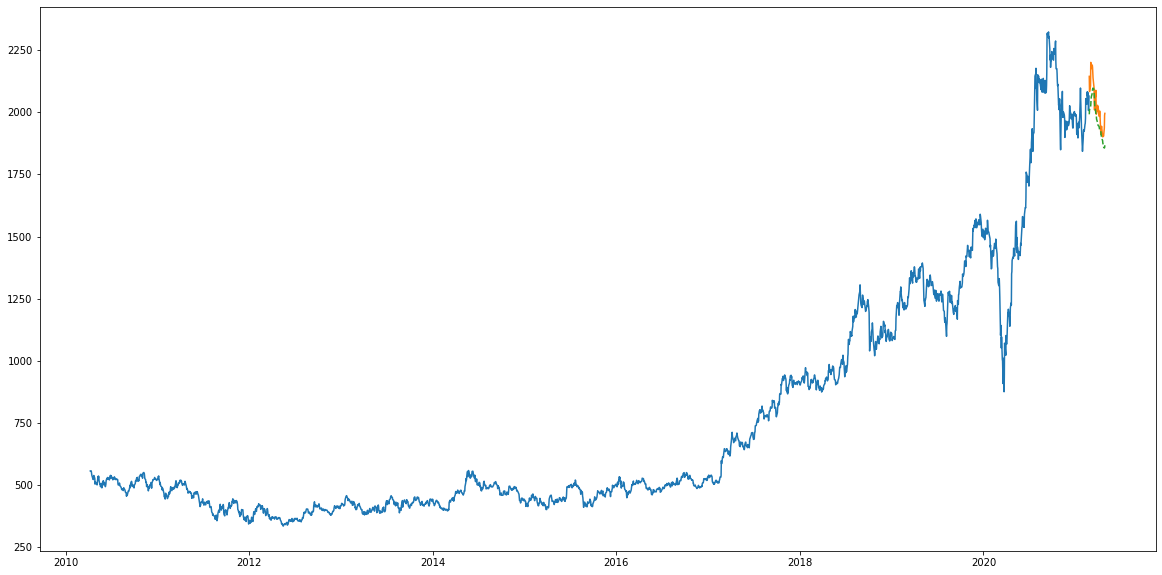

In [ ]:
data1 = data[history_points: ]
train = data1[:train_len]
test = data1[train_len:]
test['Predictions'] = y_test_predicted
plt.plot(train['Close'])
plt.plot(test['Close'] )
plt.plot(test['Predictions'],linestyle='--' )


In [ ]:
## Trades by predictions
buys = []
sells = []
thresh = 0.2

print(ohlcv_test.shape)
x = 0
for ohlcv, ind in zip(ohlcv_test, tech_ind_test):
    normalised_price_today = ohlcv[-1][0]
    normalised_price_today = np.array([[normalised_price_today]])
    price_today = y_normaliser.inverse_transform(normalised_price_today)
    ohlcvlist = []
    ohlcvlist.append(ohlcv)
    indList = []
    indList.append(ind)
    indList = np.array(indList)
    ohlcvlist = np.array(ohlcvlist)

    predicted = np.squeeze(y_normaliser.inverse_transform( model.predict(x = [ohlcvlist, indList])))
    delta = predicted - price_today
    # print(delta)
    if delta > thresh:
        buys.append((x, price_today[0][0]))
    elif delta < -thresh:
        sells.append((x, price_today[0][0]))
    x += 1
print(buys)
print(sells)


(40, 65, 5)
[(16, 1988.3)]
[(0, 2025.8), (1, 2078.0), (2, 2109.0), (3, 2114.45), (4, 2124.0), (5, 2121.7), (6, 2179.7), (7, 2168.0), (8, 2171.5), (9, 2200.0), (10, 2211.0), (11, 2199.0), (12, 2138.65), (13, 2114.8), (14, 2100.0), (15, 2071.1), (17, 2075.0), (18, 2064.0), (19, 2080.55), (20, 2050.55), (21, 2010.0000000000002), (22, 2009.6999999999998), (23, 2015.35), (24, 2019.6999999999998), (25, 2025.0000000000002), (26, 2001.25), (27, 1992.1999999999998), (28, 2010.05), (29, 2003.0), (30, 1956.05), (31, 1925.0), (32, 1920.5), (33, 1944.0), (34, 1901.0), (35, 1914.7), (36, 1896.0), (37, 1903.0), (38, 1916.25), (39, 1943.0)]


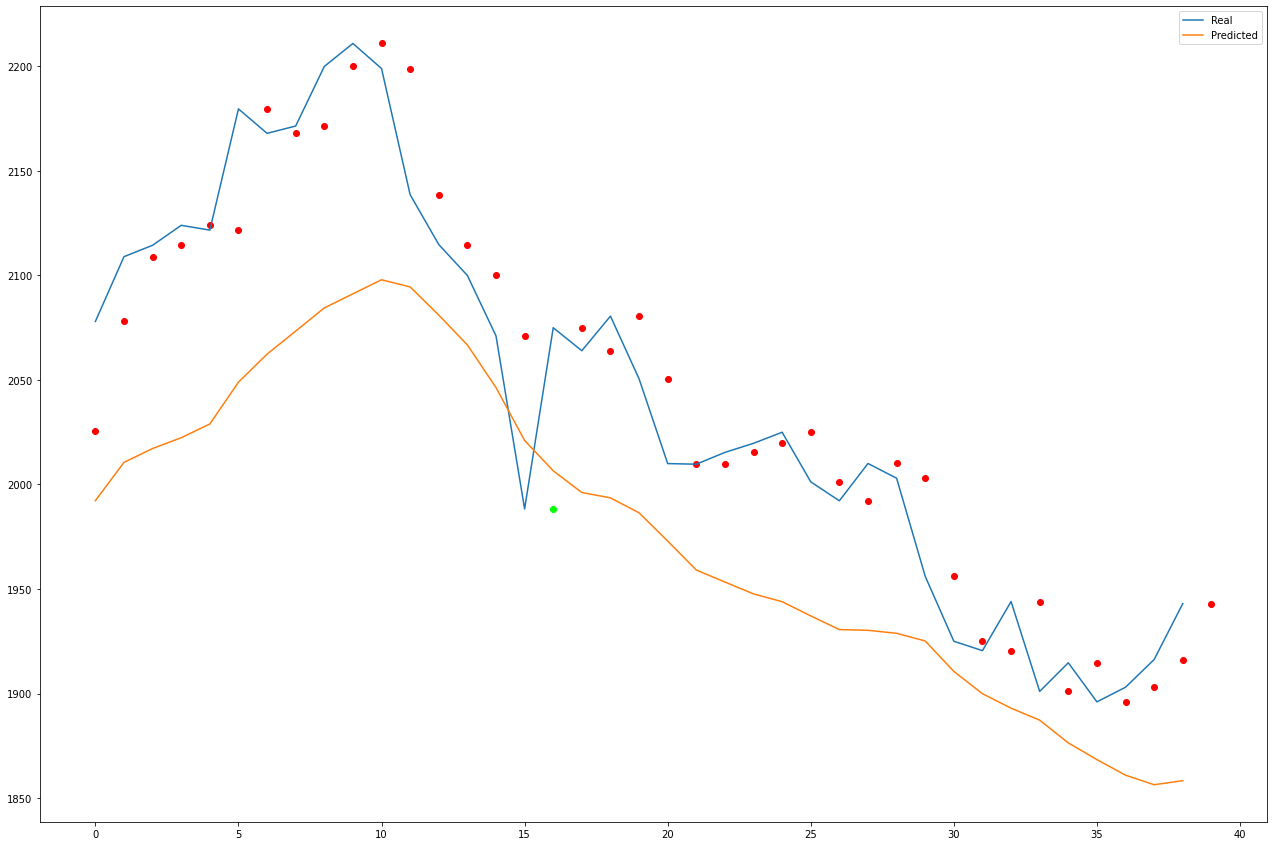

In [ ]:
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(unscaled_y_test[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')
if(len(buys)>0):
  plt.scatter(list(list(zip(*buys))[0]), list(list(zip(*buys))[1]), c='#00ff00')
if(len(sells)>0):
  plt.scatter(list(list(zip(*sells))[0]), list(list(zip(*sells))[1]), c='#ff0000')

# real = plt.plot(unscaled_y[start:end], label='real')
# pred = plt.plot(y_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

In [ ]:
def compute_earnings(buys, sells):
  purchase_amt = 10
  stock = 0
  balance = 0
  maxInvest = 0
  currInvest = 0
  while len(buys) > 0 and len(sells) > 0:
      if buys[0][0] < sells[0][0]:
          # time  to buy $10 worth of stock
          balance -= purchase_amt
          stock += purchase_amt / buys[0][1]
          buys.pop(0)
          currInvest += 10
          maxInvest = max(currInvest, maxInvest)

      else:
          # time to sell all of our stock
          balance += stock * sells[0][1]
          stock = 0
          sells.pop(0)
          currInvest = 0
  print(balance,stock,  maxInvest)
compute_earnings(buys, sells)

-10.0 0.005029422119398481 10


In [ ]:
def compute_earnings(buys, sells):
  purchase_amt = 10
  stock = 0
  balance = 10
  maxInvest = 0
  currInvest = 0
  while len(buys) > 0 and len(sells) > 0:
      if buys[0][0] < sells[0][0]:
          # time  to buy $10 worth of stock
          pur_here = min(purchase_amt, 10)
          balance -= pur_here
          purchase_amt -= pur_here
          stock += pur_here / buys[0][1]
          buys.pop(0)
      else:
          # time to sell all of our stock
          balance += stock * sells[0][1]
          purchase_amt += stock*sells[0][1]
          stock = 0
          sells.pop(0)
          currInvest = 0
  print(purchase_amt, balance,stock,  maxInvest)
compute_earnings(buys, sells)

10 10 0 0
